In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
import warnings 
warnings.filterwarnings("ignore") 

In [2]:
df=pd.read_csv("bank-full.csv", delimiter=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.shape

(45211, 17)

In [4]:
print(df.info)

<bound method DataFrame.info of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  d

In [5]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [6]:
#Check for duplicates
duplicates = df.duplicated()
df[duplicates]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [7]:
#check for missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Analysis of Categorical Values

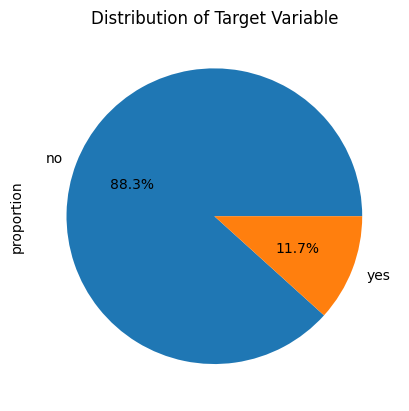

y
no     39922
yes     5289
Name: count, dtype: int64

In [24]:
#plot
df['y'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.title("Distribution of Target Variable")
plt.show()

df['y'].value_counts()

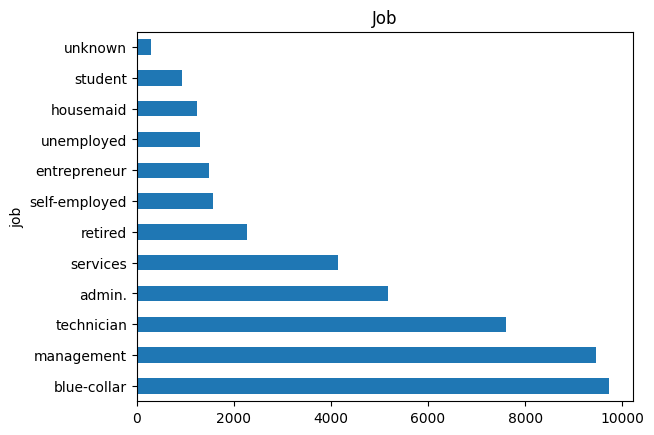

job
blue-collar      21.53
management       20.92
technician       16.80
admin.           11.44
services          9.19
retired           5.01
self-employed     3.49
entrepreneur      3.29
unemployed        2.88
housemaid         2.74
student           2.07
unknown           0.64
Name: proportion, dtype: float64


In [114]:
#Job
df.job.value_counts().plot.barh()
plt.title('Job')
plt.show()

print(df.job.value_counts(normalize=True).mul(100).round(2))

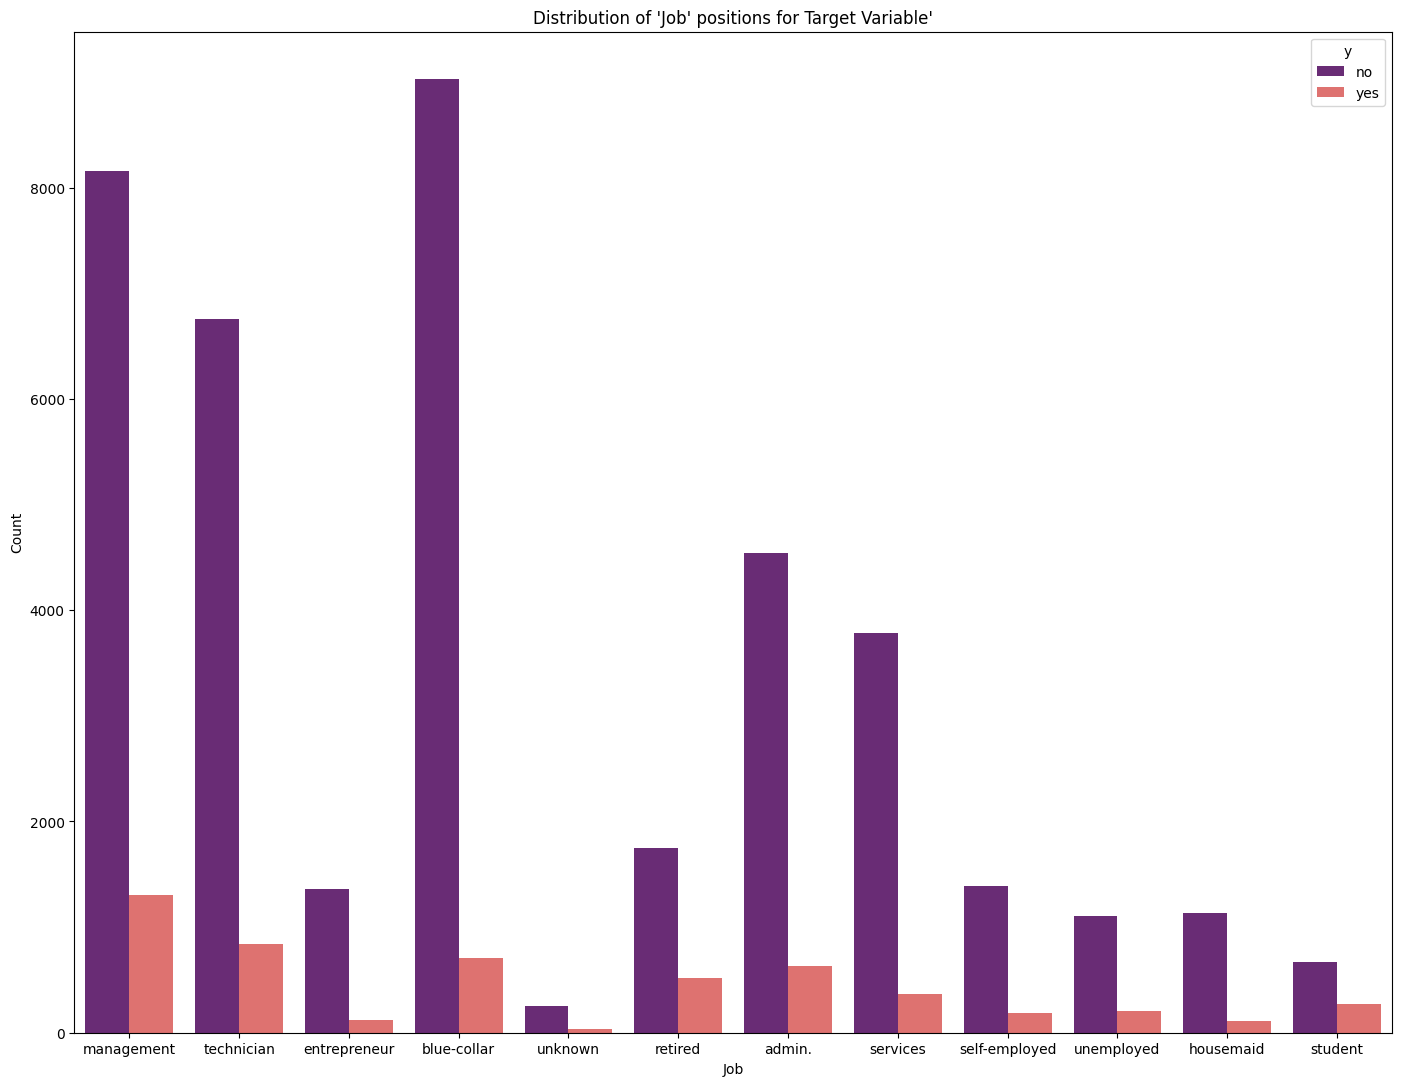

In [115]:
#calculate the percentage of each job status category
#plot 
plt.figure(figsize=(17,13))
sns.countplot(x='job', hue='y', data=df, palette='magma')
plt.title("Distribution of 'Job' positions for Target Variable'")
plt.xlabel("Job")
plt.ylabel("Count")
plt.show()

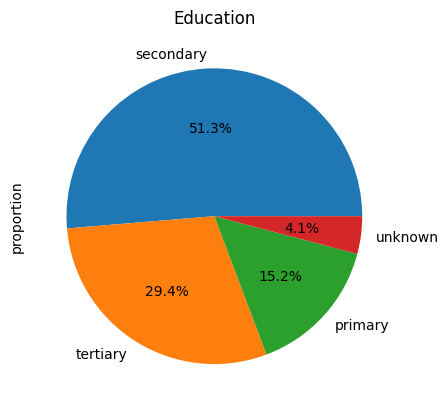

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

In [73]:
#Calculate the percentage of each education

df.education.value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.title('Education')
plt.show()

df.education.value_counts()


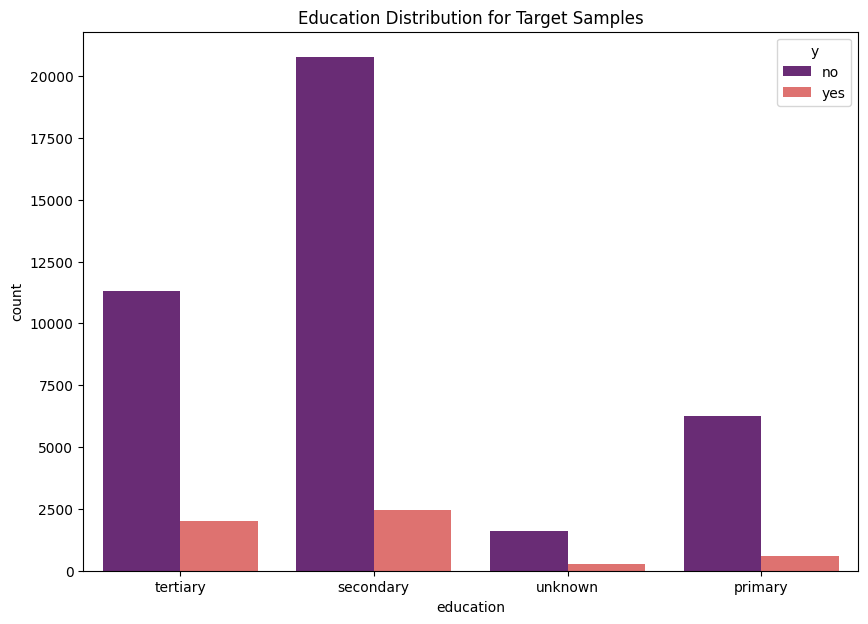

In [97]:
#Distribution of Target Samples based on education

plt.figure(figsize=(10,7))
sns.countplot(x='education', hue='y', data=df, palette='magma')
plt.xlabel('education')
plt.ylabel('count')
plt.title('Education Distribution for Target Samples')
plt.show()

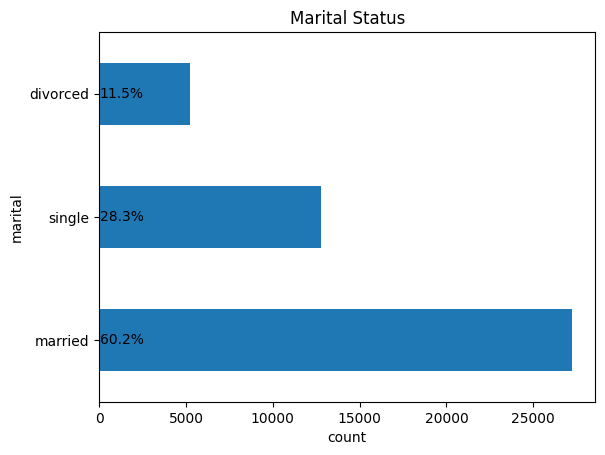

In [111]:
#Marital Status
df.marital.value_counts().plot.barh()

for index, value in enumerate(df.marital.value_counts(normalize=True).mul(100)):
    plt.text(value, index, f"{value:.1f}%", va='center')


plt.xlabel('count')
plt.title("Marital Status")
plt.show()

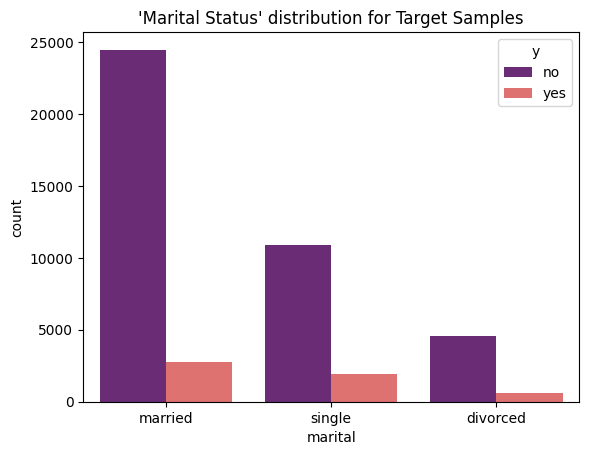

In [95]:
#Target Samples based on marital status
sns.countplot(x='marital', hue='y', data=df, palette='magma')
plt.title("'Marital Status' distribution for Target Samples")
plt.show()


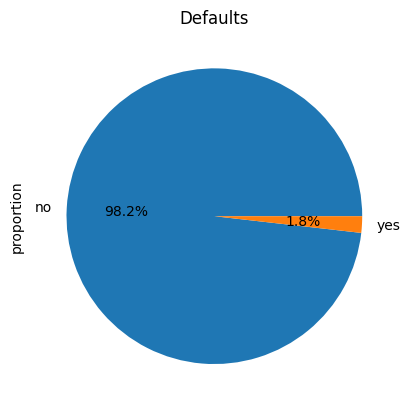

default
no     44396
yes      815
Name: count, dtype: int64

In [65]:
#Default

#Plot
df.default.value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.title("Defaults")
plt.show()


df.default.value_counts()

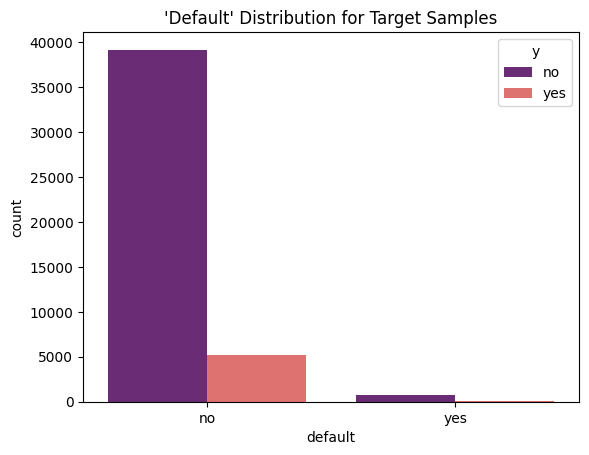

In [116]:
#Distribution of Target Samples based on defaults

sns.countplot(x='default', hue='y', data=df, palette='magma')
plt.title("'Default' Distribution for Target Samples")
plt.show()

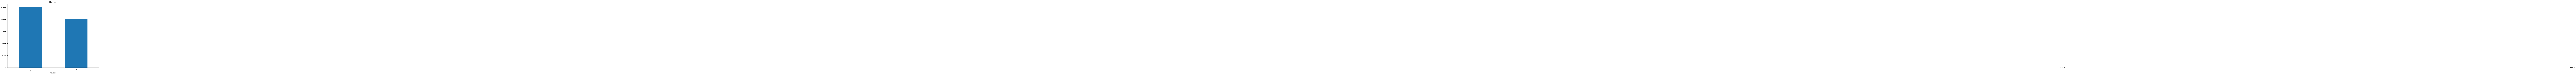

housing
yes    25130
no     20081
Name: count, dtype: int64

In [122]:
#Housing

plt.figure(figsize=(10,7))
df.housing.value_counts().plot.bar()

for index, value in enumerate(df.housing.value_counts(normalize=True).mul(100)):
    plt.text(value, index, f"{value:.1f}%", va='center')

plt.title("Housing")
plt.show()

df.housing.value_counts()


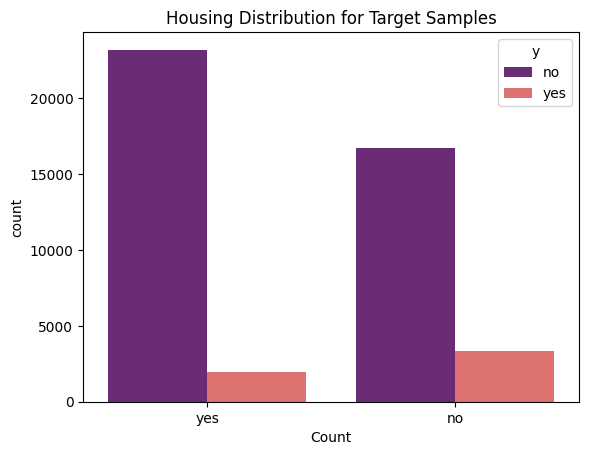

housing
yes    25130
no     20081
Name: count, dtype: int64

In [123]:
#Housing-Distribution of Target Samples

sns.countplot(x='housing', hue='y', data=df, palette='magma')

plt.xlabel('Count')
plt.title("Housing Distribution for Target Samples")
plt.show()

df.housing.value_counts()

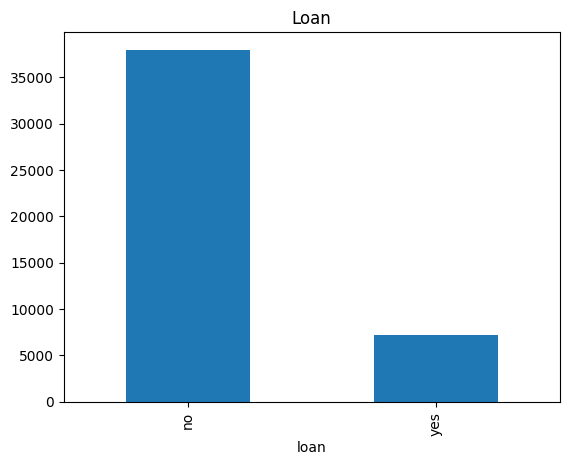

loan
no     37967
yes     7244
Name: count, dtype: int64

In [126]:
#Loan

df.loan.value_counts().plot.bar()

plt.title('Loan')
plt.show()

df.loan.value_counts()

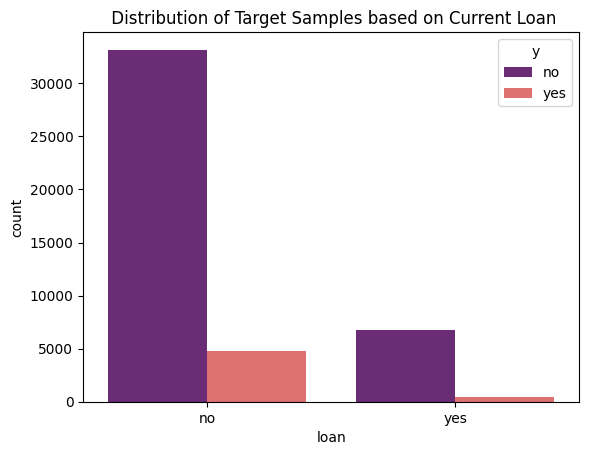

loan
no     37967
yes     7244
Name: count, dtype: int64

In [98]:
#Loan- Distribution of Target Samples

sns.countplot(x='loan', hue='y', data=df, palette='magma')
plt.title(" Distribution of Target Samples based on Current Loan")
plt.show()

df.loan.value_counts()

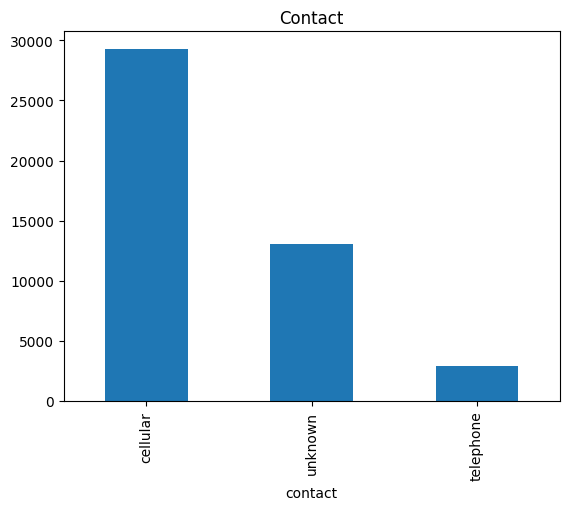

contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

In [129]:
#Contact

df.contact.value_counts().plot.bar()

plt.title('Contact')
plt.show()

df.contact.value_counts()


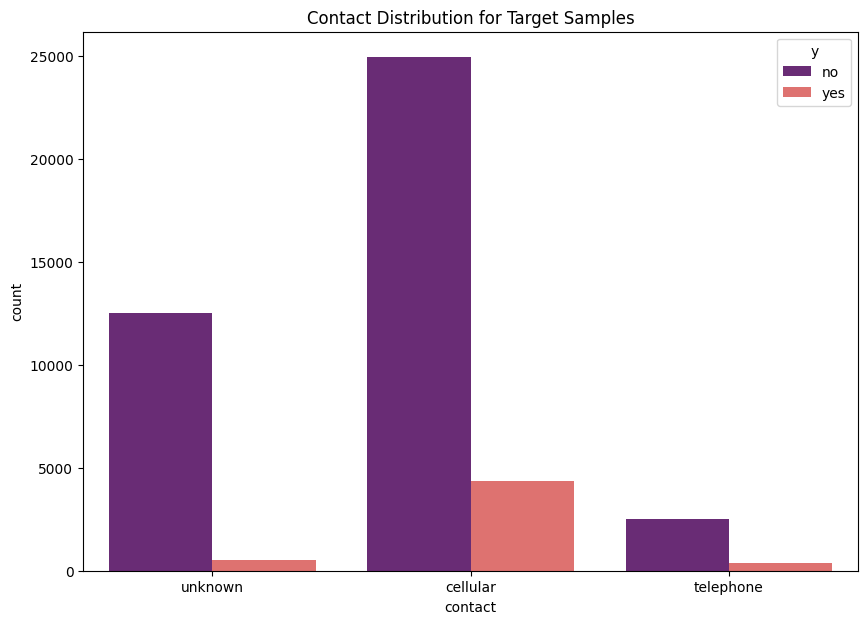

In [91]:
#Contact-Distribution of Target Samples

plt.figure(figsize=(10,7))
sns.countplot(x='contact', hue='y', data=df, palette='magma')
plt.title('Contact Distribution for Target Samples')
plt.show()


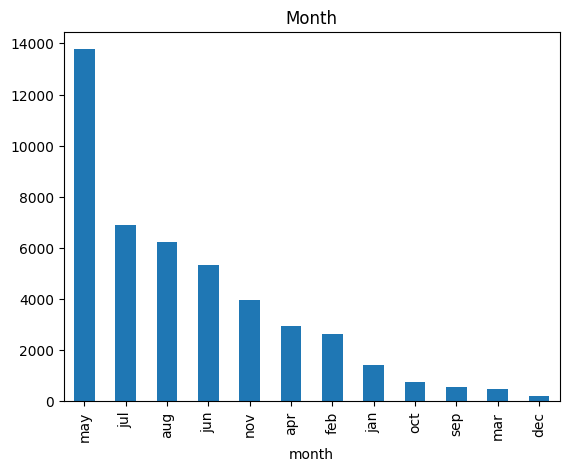

month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64

In [131]:
#Month

df.month.value_counts().plot.bar()

plt.title('Month')
plt.show()

df.month.value_counts()



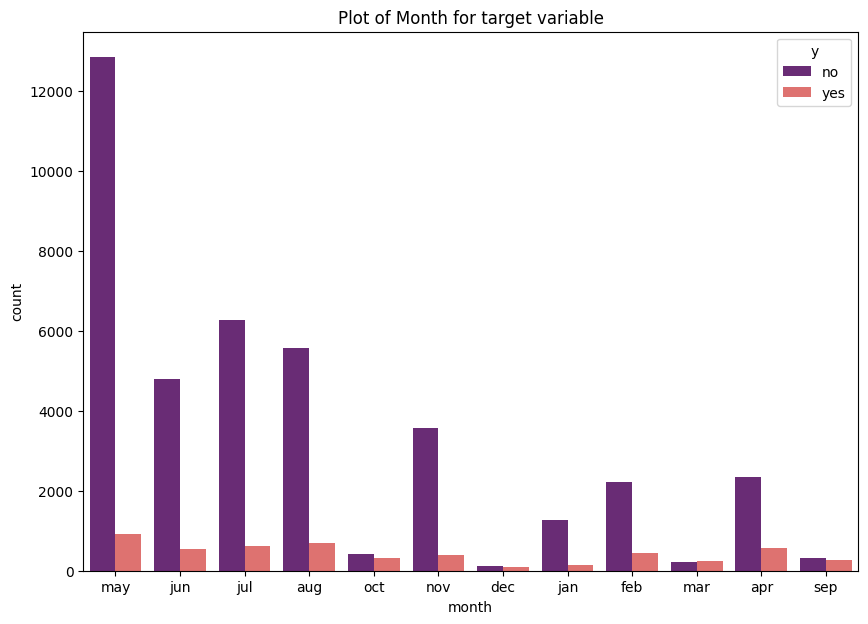

In [86]:
#Month

plt.figure(figsize=(10,7))
sns.countplot(x='month', hue='y', data=df, palette='magma')
plt.title('Plot of Month for target variable')
plt.show()


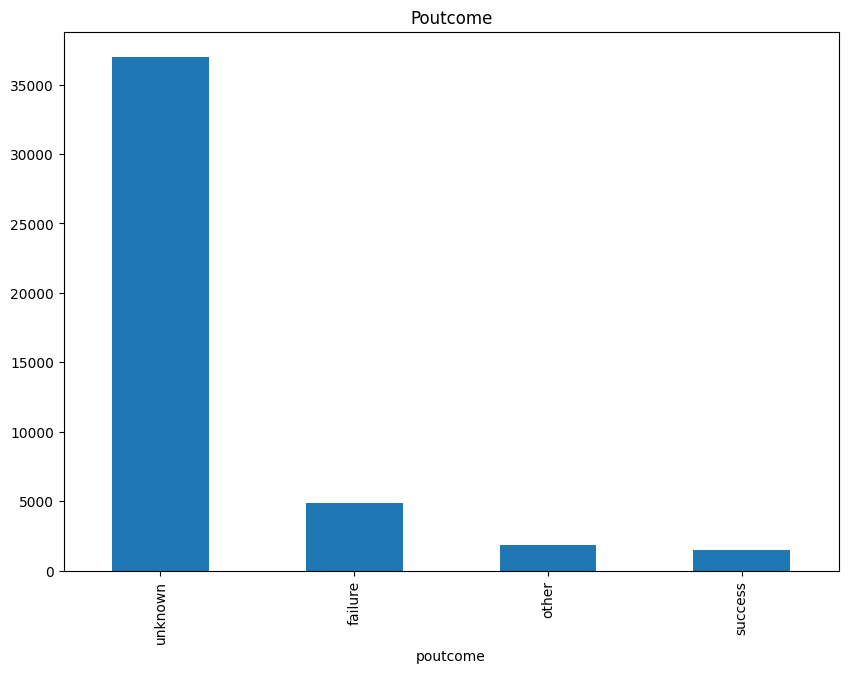

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

In [138]:
#Poutcome

plt.figure(figsize=(10,7))
df.poutcome.value_counts().plot.bar()

plt.title('Poutcome')
plt.show()

df.poutcome.value_counts()


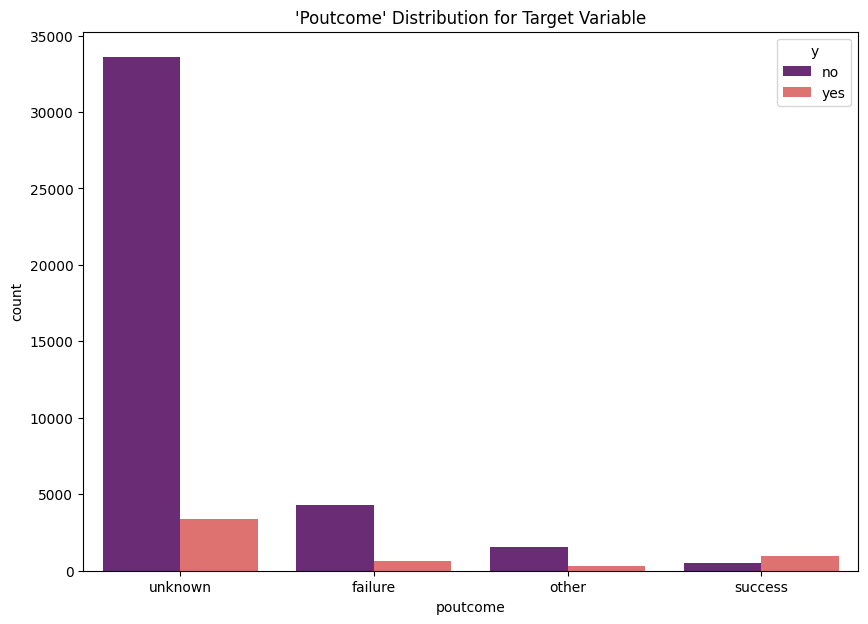

In [90]:
#Poutcome-Distribution of Target Variables

plt.figure(figsize=(10,7))
sns.countplot(x='poutcome', hue='y', data=df, palette='magma')
plt.title("'Poutcome' Distribution for Target Variable")
plt.show()


# Analysis of Numeric features

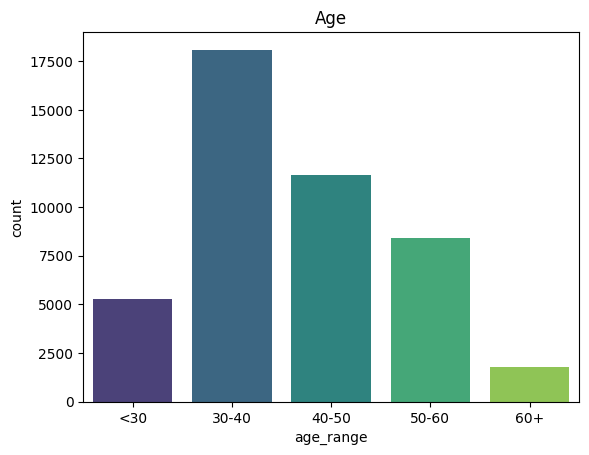

In [134]:
#Age

sns.countplot(x='age_range', data=df, palette='viridis')
plt.title('Age')
plt.show()


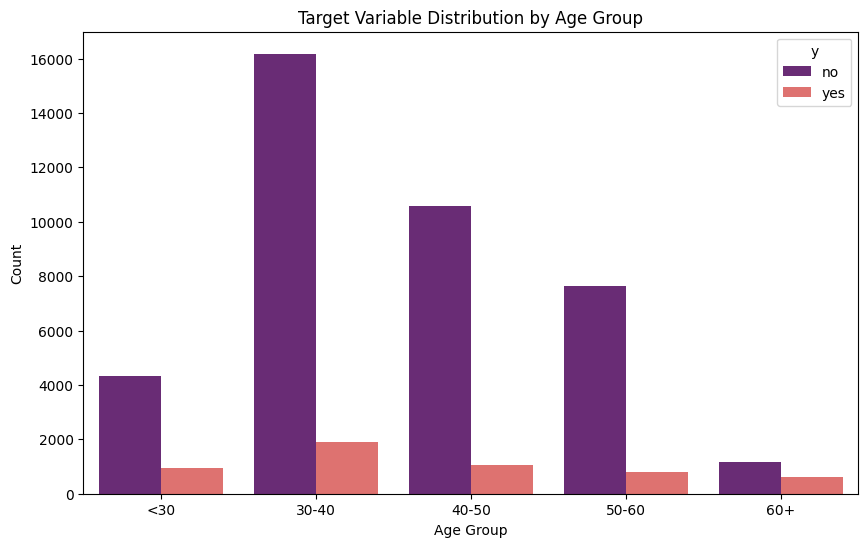

In [101]:
#Age-Distribution of Target Variables

# Define age bins and labels
age_bins = [0, 30, 40, 50, 60, 100]
age_labels = ['<30', '30-40', '40-50', '50-60', '60+']


#Create an age range column
df['age_range'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

#plot
plt.figure(figsize=(10, 6))
sns.countplot(x='age_range', hue='y', data=df, palette='magma')
plt.title('Target Variable Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

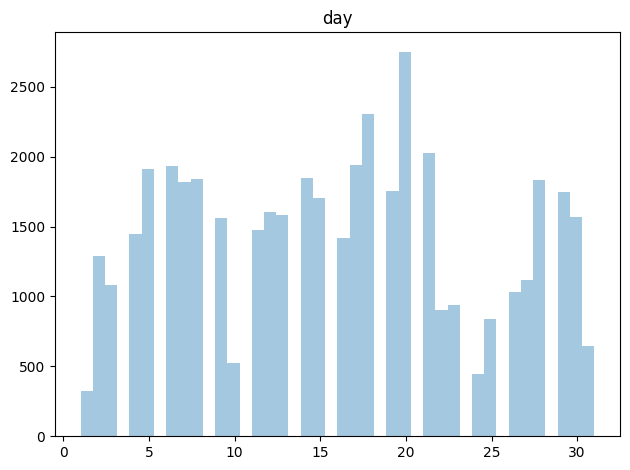

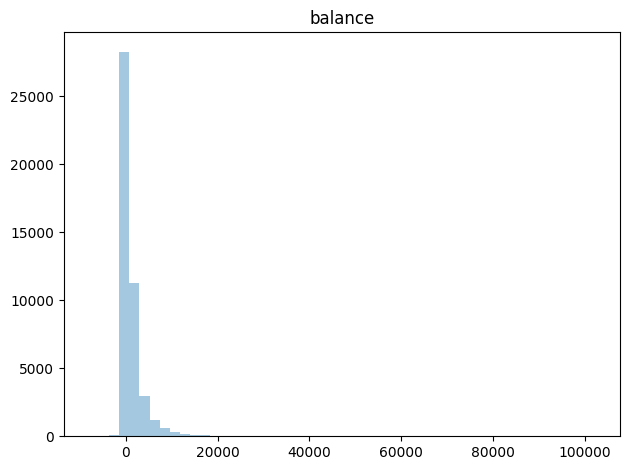

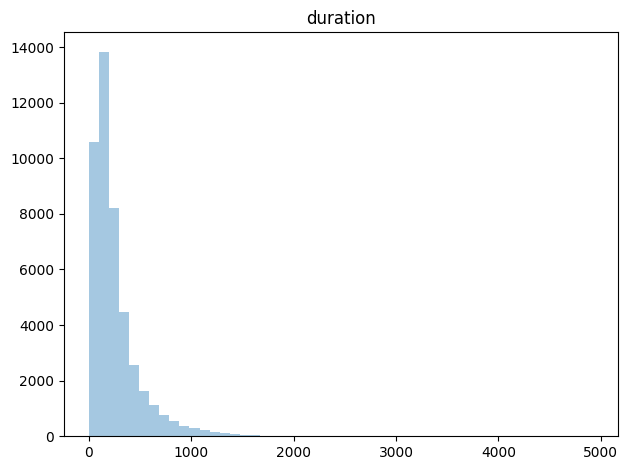

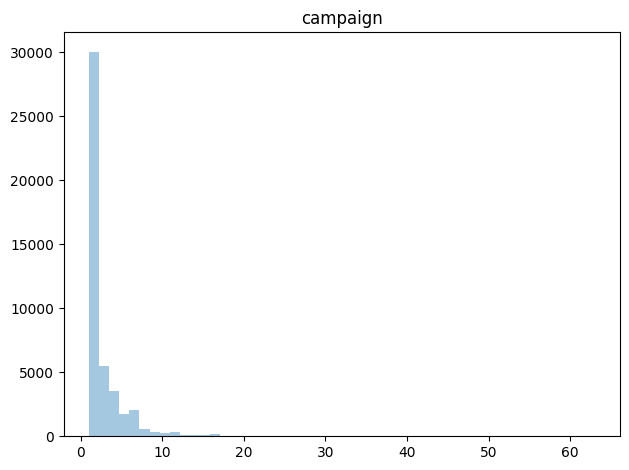

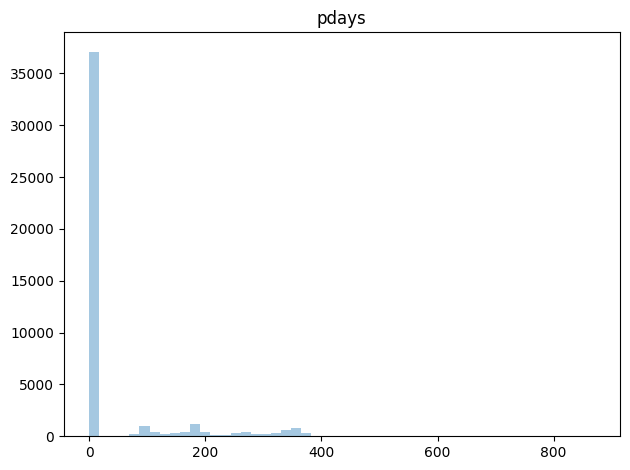

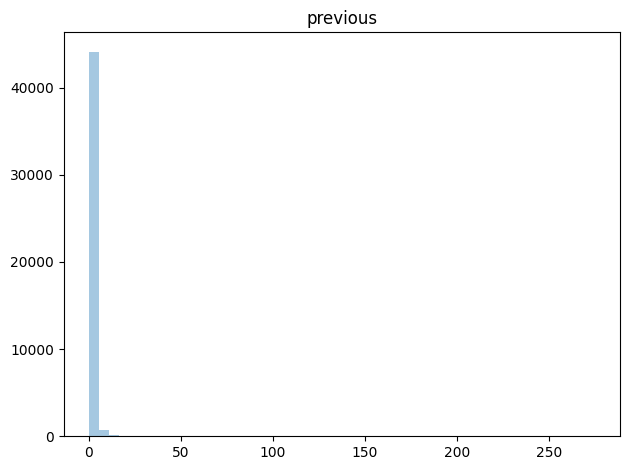

In [106]:
numerical_variables = ['day', 'balance', 'duration', 'campaign', 'pdays', 'previous']

for col in numerical_variables:
    sns.distplot(x=df[col], kde = False)
    plt.title(col)
    plt.tight_layout()
    plt.show()

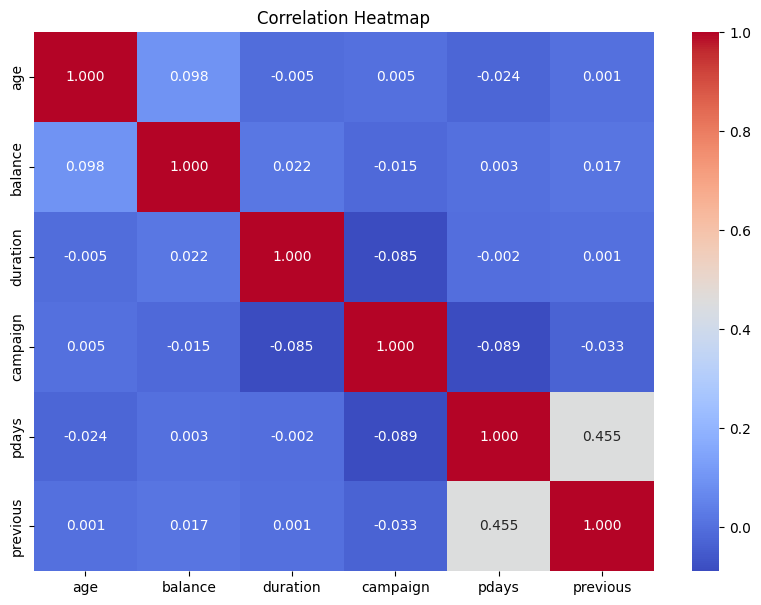

In [143]:
# correlation matrix

ndf= df[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']]

corr = ndf.corr()
plt.figure(figsize = (10,7))
sns.heatmap(corr, annot=True, fmt=".3f", cmap='coolwarm')  
plt.title("Correlation Heatmap")
plt.show()
